<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 6</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistente: Sebastián Calcagno , <p>
</div>

[Documentacion R de Neural Network Time Series Forecasts](https://search.r-project.org/CRAN/refmans/forecast/html/nnetar.html)

[Documentacion python modelo arnet](https://arxiv.org/abs/1911.12436)

In [ ]:
install.packages('fpp2')   # Es del libro Forecasting: Principles and Practice de Hyndman. Tiene datos y funciones para el análisis y prediccion de series temporales.
# install.packages('ggplot2')
# install.packages('forecast')
# install.packages('RCurl')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’




In [ ]:
#####################
## CARGAR PAQUETES ##
#####################

suppressPackageStartupMessages({
  library(fpp2)
  library(ggplot2)
  library(forecast)
})


# Ejemplo 1 - Annual Canadian Lynx Trappings (1821-1934)

Es un dataset comun que nos indica el numero total de linces atrapados en un año determinado

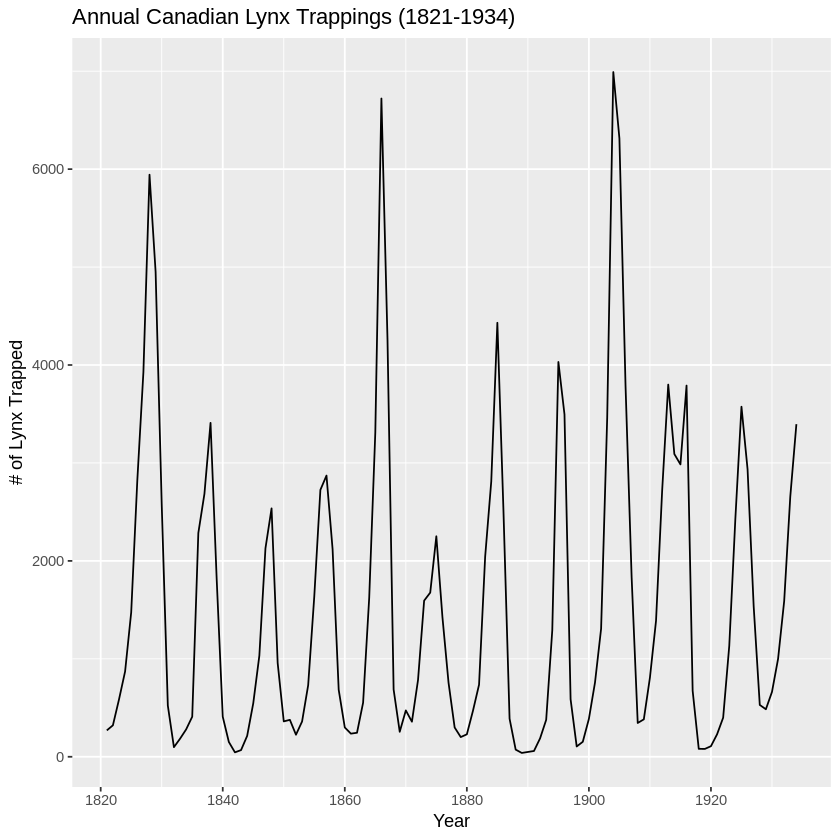

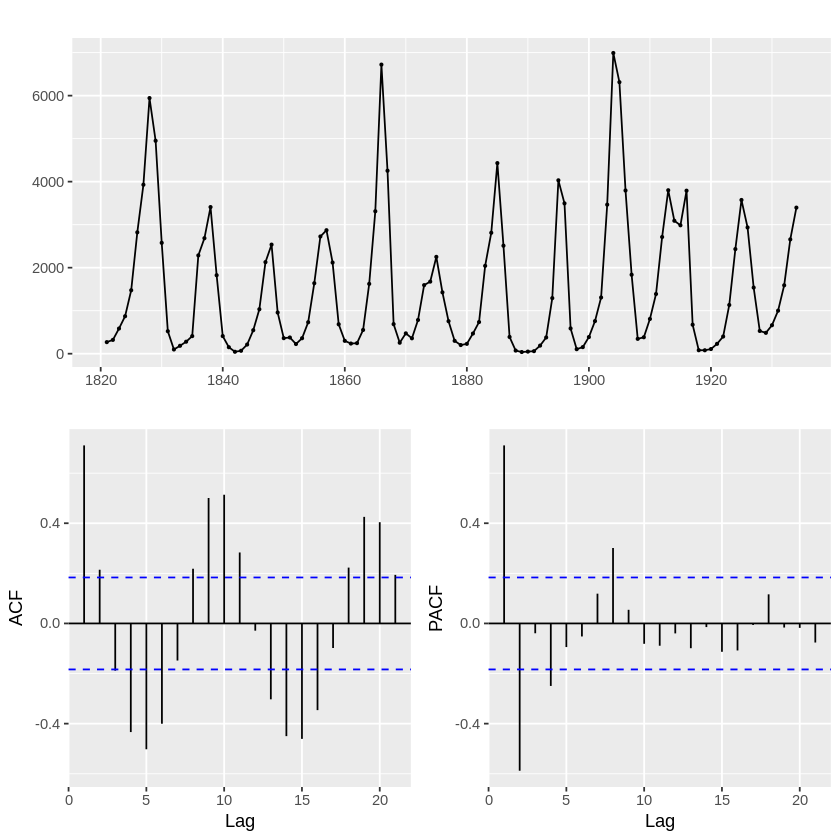

In [ ]:
# libreria q escribio Rob J Hyndman . capitulo 11, implementacion de estas redes
## CARGAR DATOS
data(lynx)

## GRÁFICO DE LA SERIE Annual Canadian Lynx Trappings (1821-1934)

autoplot(lynx) +
  xlab("Year") +
  ylab("# of Lynx Trapped") +
  ggtitle("Annual Canadian Lynx Trappings (1821-1934)")

## GRÁFICO DE LA SERIE, FAC Y FACP
ggtsdisplay(lynx)

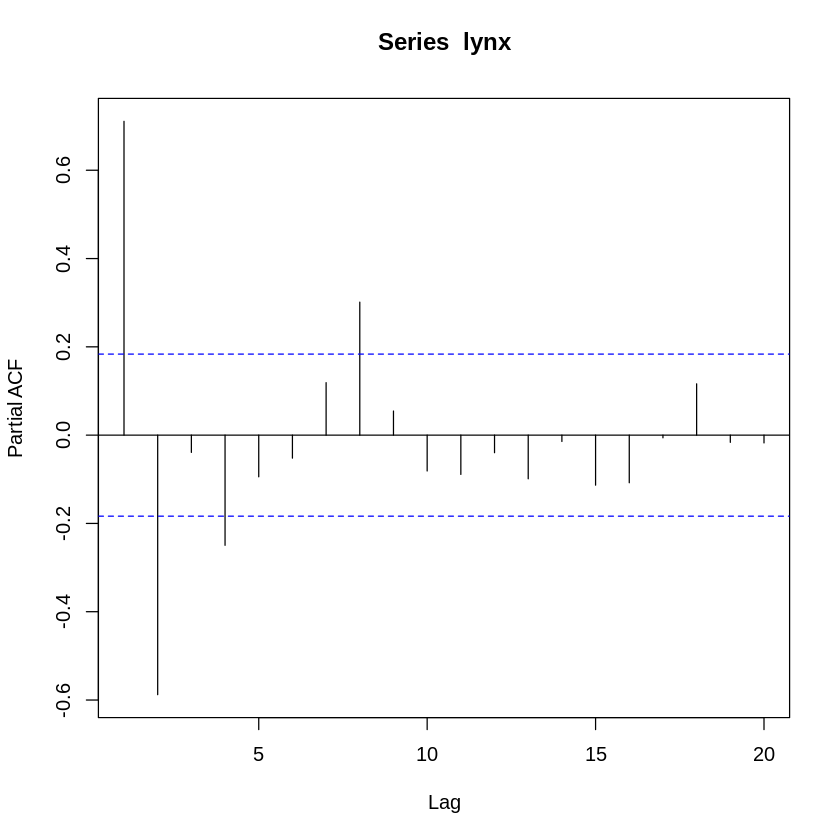

In [ ]:
#acf(lynx)
pacf(lynx)

Entrenar una red, donde tengamos en cuenta 4 valores pasados de la misma. y suponemos dos nodos ocultos. Es para series univariadas. Aqui capta el comportamiento no estacionario.

In [ ]:
help(nnetar)

In [ ]:
y = BoxCox(lynx, lambda = BoxCox.lambda(lynx))

In [ ]:
print(y)
# Se puede usar como variable transformada por box cox ---> "y"
# se puede usar la variable original lynx

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  8.824767  9.244462 10.757018 11.839088 13.375729 15.444500 16.582033
  [8] 18.088024 17.411384 15.143479 10.464092  6.631752  7.960179  8.910525
 [15]  9.838467 14.749682 15.279574 16.088053 14.030939  9.838467  7.529588
 [22]  5.157004  5.917498  8.287466 10.576032 12.323266 14.521469 15.090545
 [29] 12.104802  9.529658  9.636271  8.411918  9.522863 11.354633 13.696465
 [36] 15.328803 15.503442 14.506362 11.174256  9.074500  8.521150  8.607356
 [43] 10.604575 13.668109 15.987692 18.554044 16.864673 11.186078  8.700046
 [50] 10.205566  9.509224 11.546602 13.612652 13.767326 14.701095 13.273436
 [57] 11.446605  9.074500  8.156920  8.452152 10.183897 11.373238 14.387966
 [64] 15.432605 17.010517 15.057911  9.713741  6.053076  4.904356  5.309984
 [71]  5.650570  8.007816  9.636271 12.977642 16.673416 16.174130 10.766021
 [78]  6.771107  7.557852  9.700971 11.453851 13.012013 16.144309 18.705097
 [85] 18.315722 16.460055 14.05150

In [ ]:
## ENTRENAR MODELO NNAR
nn1 = nnetar(y = lynx ,
             p = 4,
             P = 0,
             size = 3,
             )

In [ ]:
## VER ESTRUCTURA DE LOS DATOS
print(nn1)

Series: lynx 
Model:  NNAR(4,3) 
Call:   nnetar(y = lynx, p = 4, P = 0, size = 3)

Average of 20 networks, each of which is
a 4-3-1 network with 19 weights
options were - linear output units 

sigma^2 estimated as 273410



	Ljung-Box test

data:  Residuals from NNAR(4,3)
Q* = 4.7366, df = 10, p-value = 0.9081

Model df: 0.   Total lags used: 10



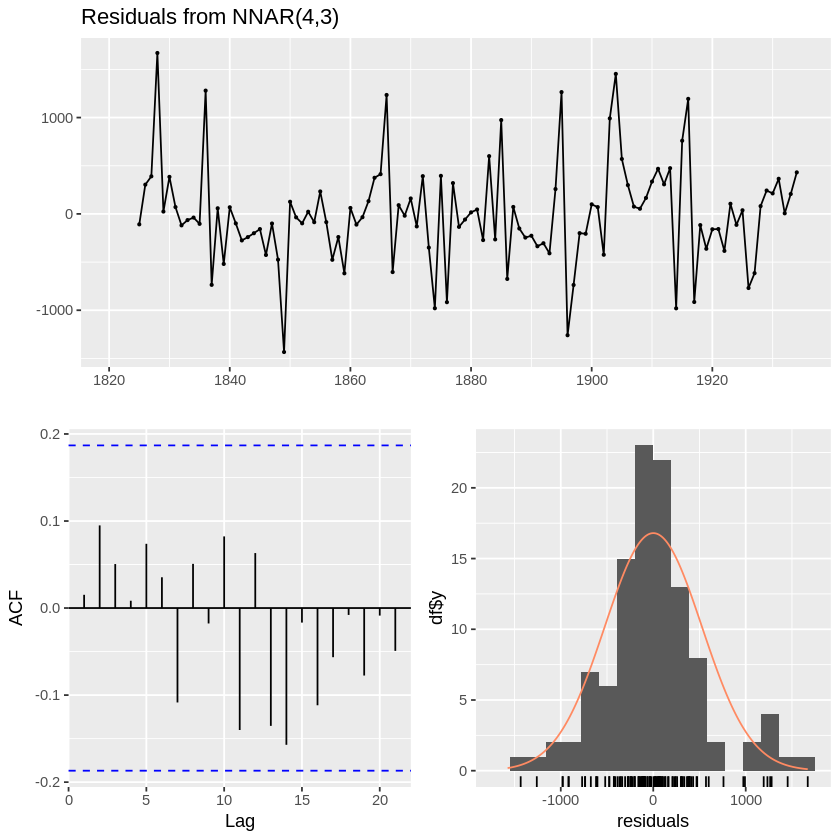

In [ ]:
## CHEQUEAR ESTRUCTURA DE LOS RESIDUOS DEL MODELO
checkresiduals(nn1)

Prueba de Autocorrelación Serial de Ljung Box



In [ ]:
h<-c(1:length(lynx)-1)
for (i in 1:length(lynx)-1) {
  Q=Box.test(nn1$residuals, lag=i, type='Ljung-Box')
  h[i]<-Q$p.value
}
head(h)

# Un valor p bajo (menor a 0.05) indicaria que se puede rechazar la ho, lo que sugiere que hay autocorrelacion en los residuos

[1] 0.8713047 0.5899923 0.7173544 0.8514647 0.8495099 0.9058334

La hipótesis nula señala que los datos se distribuyen de forma independiente (es decir, las correlaciones son 0, por lo que cualquier correlación observada en los datos resulta de la aleatoriedad del proceso de muestreo), y la hipótesis alternativa señala que los datos no se distribuyen de forma independiente y exhiben correlación serial.

Se encuentra que el p-value es mayor a alpha en cada uno de sus resagos, ergo, los residuos del modelo cumplen el supuesto de no autocorrelación.

In [ ]:
tseries::jarque.bera.test(na.omit(resid(nn1)))

# Un valor p menor a 0.05 indica que se puede rechazar la ho, los residuos no siguen una dist normal.


	Jarque Bera Test

data:  na.omit(resid(nn1))
X-squared = 13.704, df = 2, p-value = 0.001057


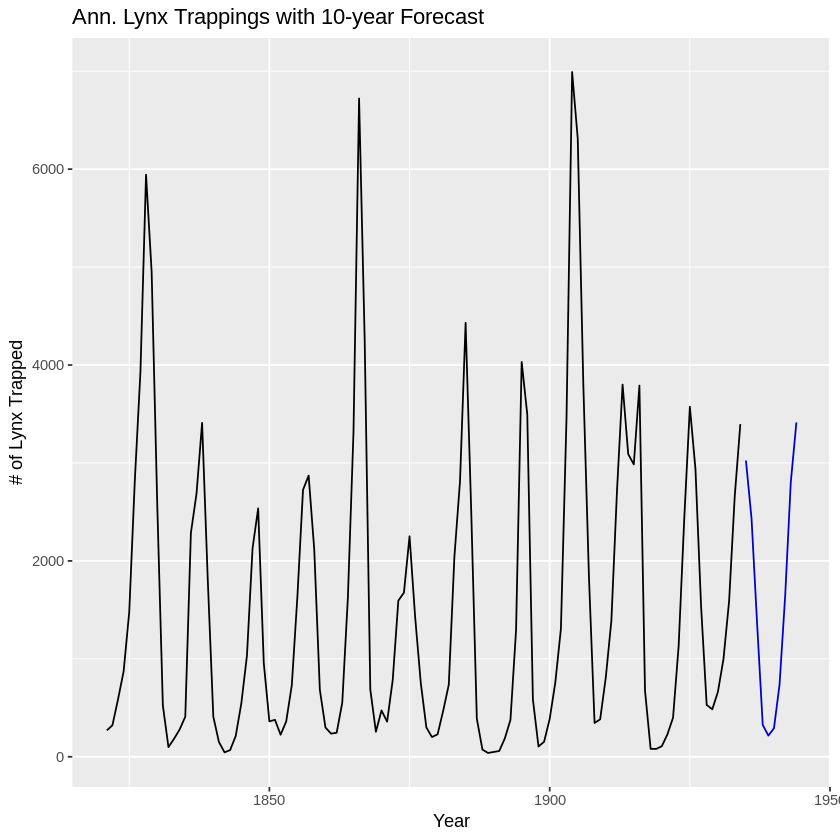

In [ ]:
fc1 = forecast(nn1, h = 10)
autoplot(fc1) +
  xlab("Year") +
  ylab("# of Lynx Trapped") +
  ggtitle("Ann. Lynx Trappings with 10-year Forecast")

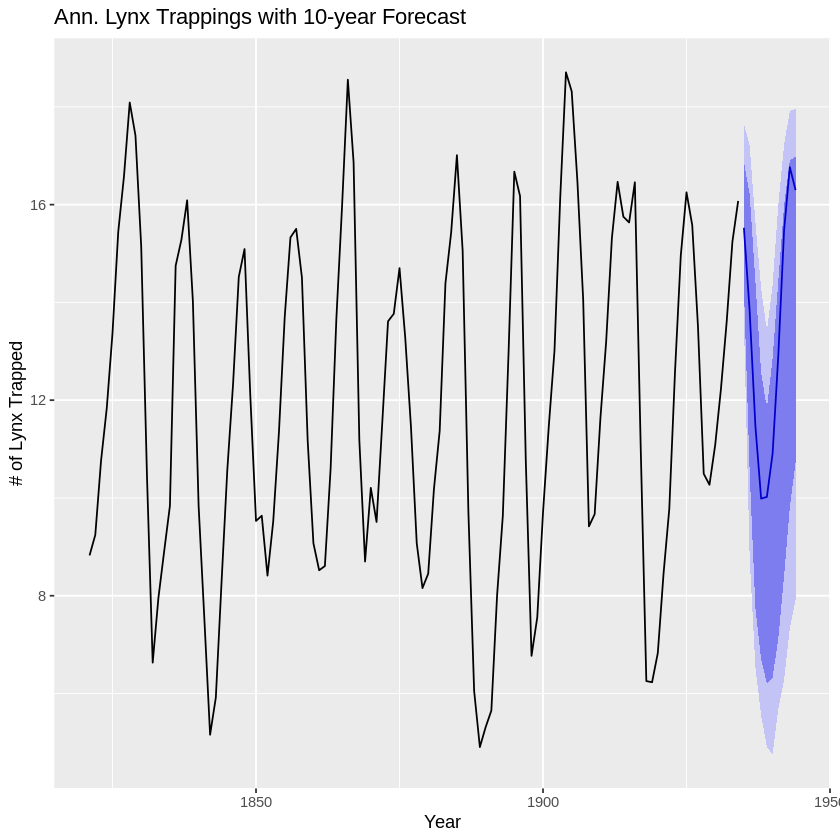

In [ ]:
## FORECASTING CON INTERVALOS DE PREDICCIÓN
fc1.PI = forecast(nn1,h=10, PI = T)
autoplot(fc1.PI) +
  xlab("Year") +
  ylab("# of Lynx Trapped") +
  ggtitle("Ann. Lynx Trappings with 10-year Forecast")

In [ ]:
## VISTA DE LOS INTERVALOS PREDICHOS
fc1.PI

     Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
1935      15.526548 14.288056 16.86837 13.617201 17.66295
1936      13.822301 10.533281 16.21876  8.783935 17.20580
1937      11.474916  7.751898 14.43454  6.536167 15.64295
1938       9.986156  6.700357 12.55823  5.550501 14.27998
1939      10.021867  6.207821 11.83653  4.909584 13.42001
1940      10.909208  6.326867 12.85384  4.756175 14.35933
1941      12.932184  7.133698 14.44970  5.695159 16.00974
1942      15.478222  8.401850 15.98346  6.274459 17.22813
1943      16.767414  9.810209 16.90559  7.339999 17.91664
1944      16.296941 10.726576 16.98454  7.910525 17.95585

Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


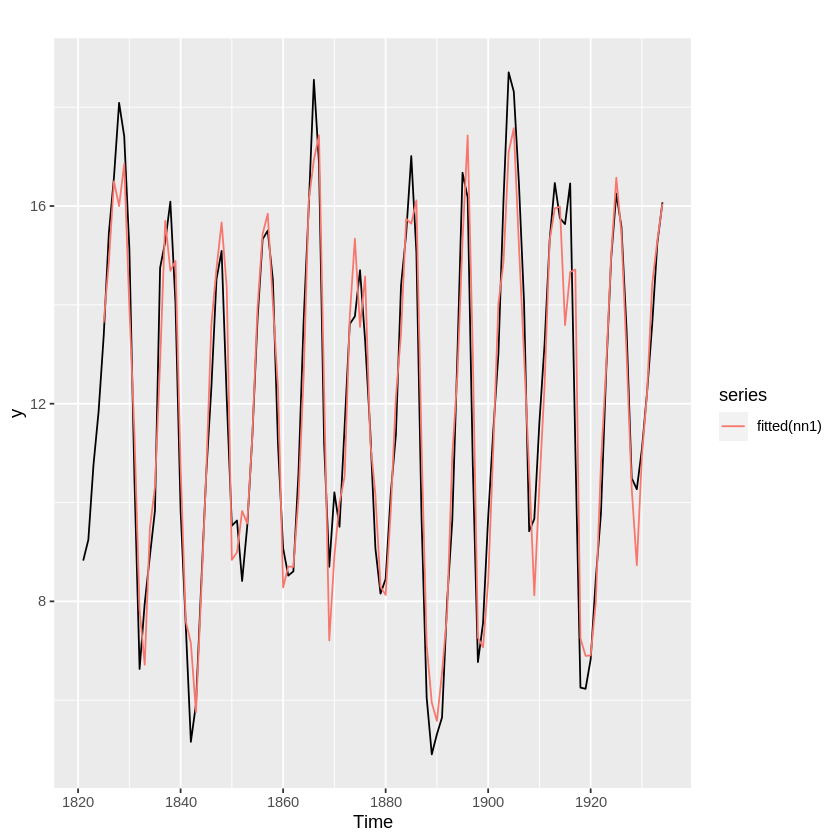

In [ ]:
## GRAFICO DE LA SERIE ORIGINAL Y EL MODELO AJUSTADO
autoplot(y) +
  autolayer(fitted(nn1))

In [ ]:
length(y)

[1] 114

In [ ]:
## CONSULTAR CANTIDAD DE DATOS DE LA SERIE
length(lynx)    ## 114 DATOS

[1] 114

In [ ]:
## SEPARAR EN CONJUNTO DE ENTRENAMIENTO Y DE TESTING
y.train = head(y,100)   ## TOMAR LOS PRIMEROS 100
y.test = tail(y,14)     ## TOMAR LOS ÚLTIMOS 14

In [ ]:
## SEPARAR EN CONJUNTO DE ENTRENAMIENTO Y DE TESTING
lynx.train = head(lynx,100)   ## TOMAR LOS PRIMEROS 100
lynx.test = tail(lynx,14)     ## TOMAR LOS ÚLTIMOS 14

In [ ]:
## ENTRENAR EL MODELO CON LOS DATOS DEL CONJUNTO DE ENTRENAMIENTO
nn1_y = nnetar(y.train,
             p=4,
             P=0,
             size=3)
nn1_y
## FORECASTING PARA LOS 14 PASOS ADELANTE DE LA SERIE
fc1_y = forecast(nn1_y,h=14)

Series: y.train 
Model:  NNAR(4,3) 
Call:   nnetar(y = y.train, p = 4, P = 0, size = 3)

Average of 20 networks, each of which is
a 4-3-1 network with 19 weights
options were - linear output units 

sigma^2 estimated as 1.098

In [ ]:
## ENTRENAR EL MODELO CON LOS DATOS DEL CONJUNTO DE ENTRENAMIENTO
nn1 = nnetar(lynx.train,
             p=4,
             P=0,
             size=3)
nn1
## FORECASTING PARA LOS 14 PASOS ADELANTE DE LA SERIE
fc1 = forecast(nn1,h=14)

Series: lynx.train 
Model:  NNAR(4,3) 
Call:   nnetar(y = lynx.train, p = 4, P = 0, size = 3)

Average of 20 networks, each of which is
a 4-3-1 network with 19 weights
options were - linear output units 

sigma^2 estimated as 295151

In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
accuracy(fc1_y,y.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001137131,1.047972,0.8572948,-1.215343,7.881147,0.4485708,0.0004198223,NA
Test set,1.159333080,1.987083,1.6386734,9.599741,13.478716,0.8574192,0.8641998035,1.27635


In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
accuracy(fc1,lynx.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.08850811,566.8501,394.8769,-45.11555,64.64698,0.4630697,-0.001853855,NA
Test set,-254.30230917,980.1048,736.6355,-20.19085,65.91918,0.8638480,0.784052313,2.347865


En el conjunto de prueba, el Modelo con la trasnformacion de Box Cox también tiene métricas de error más bajas (RMSE, MAE, MAPE) comparado con el Modelo sin la transformacion.
El Modelo con la transformacion de Box Cox es superior al Modelo sin en términos de las métricas de error tanto en el conjunto de entrenamiento como en el conjunto de prueba. Entonces, el Modelo coon Box Cox proporciona una mejor precisión de predicción y un mejor ajuste general.

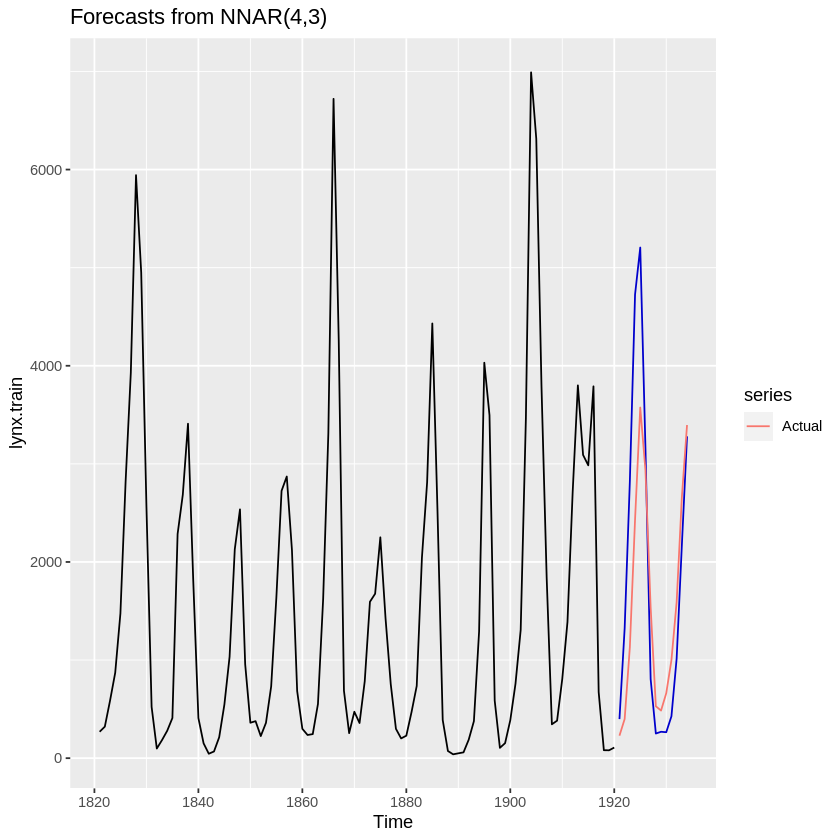

In [ ]:
## GRAFICAR LA SERIE Y LAS PREDICCIONES SOBRE EL CONJUNTO DE DATOS DE TESTING
autoplot(fc1) +
  autolayer(lynx.test,series="Actual")


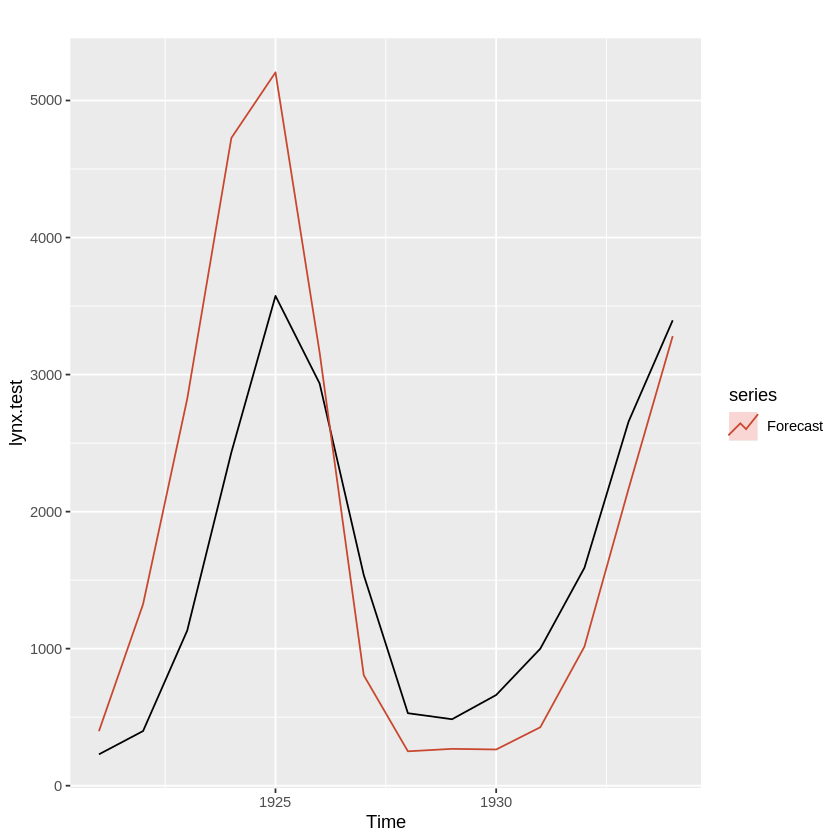

In [ ]:
## GRAFICAR LOS DATOS REALES DEL CONJUNTO DE TESTING CON LAS PREDICCIONES
autoplot(lynx.test) +
  autolayer(fc1,series="Forecast")

# Ejemplo 2. Base= "nottem".Temperaturas mensuales promedios en Nottingham, durante 1920-1939.

In [ ]:
# Aqui hay varios datasets a elegir, quizas algunos no son series de tiempo. Pero si hay varios.
# Correr este codigo para ver los datasets =
data()

In [ ]:
library(datasets)

nottem <- datasets::nottem
print(class(nottem))

df <- as.data.frame(nottem)
print(head(df))

[1] "ts"
     x
1 40.6
2 40.8
3 44.4
4 46.7
5 54.1
6 58.5


In [ ]:
## CONFIGURAR LOS DATOS COMO SERIE DE TIEMPO
nottem_ts = ts(df,start=1920,frequency = 12)

In [ ]:
nottem_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1920,40.6,40.8,44.4,46.7,54.1,58.5,57.7,56.4,54.3,50.5,42.9,39.8
1921,44.2,39.8,45.1,47.0,54.1,58.7,66.3,59.9,57.0,54.2,39.7,42.8
1922,37.5,38.7,39.5,42.1,55.7,57.8,56.8,54.3,54.3,47.1,41.8,41.7
1923,41.8,40.1,42.9,45.8,49.2,52.7,64.2,59.6,54.4,49.2,36.3,37.6
1924,39.3,37.5,38.3,45.5,53.2,57.7,60.8,58.2,56.4,49.8,44.4,43.6
1925,40.0,40.5,40.8,45.1,53.8,59.4,63.5,61.0,53.0,50.0,38.1,36.3
1926,39.2,43.4,43.4,48.9,50.6,56.8,62.5,62.0,57.5,46.7,41.6,39.8
1927,39.4,38.5,45.3,47.1,51.7,55.0,60.4,60.5,54.7,50.3,42.3,35.2
1928,40.8,41.1,42.8,47.3,50.9,56.4,62.2,60.5,55.4,50.2,43.0,37.3
1929,34.8,31.3,41.0,43.9,53.1,56.9,62.5,60.3,59.8,49.2,42.9,41.9


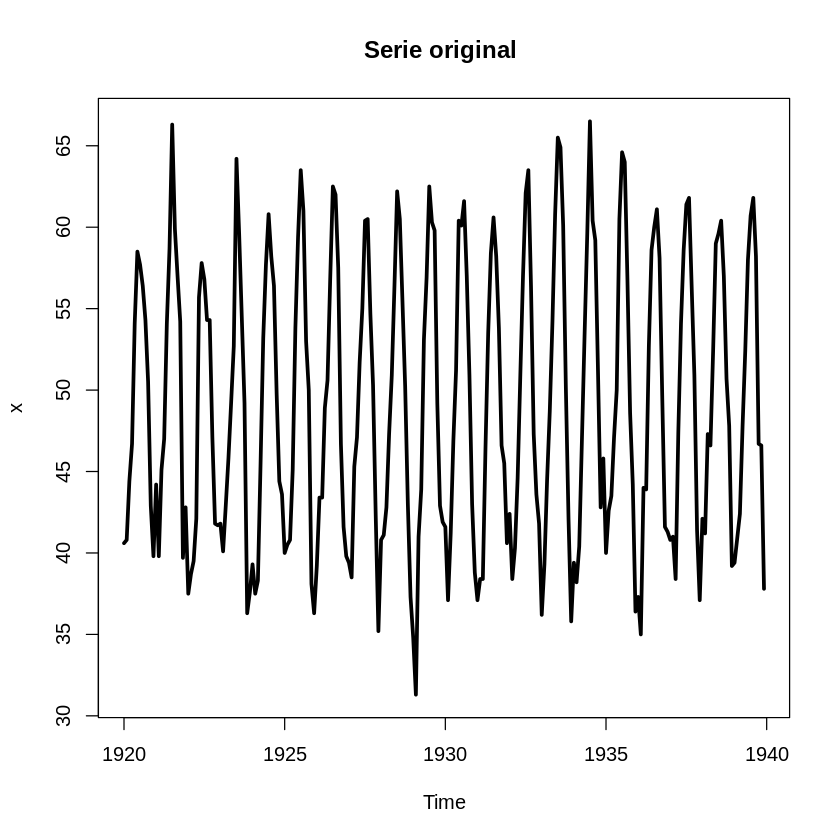

In [ ]:
## GRAFICAR LA SERIE
plot(nottem_ts,lwd=3,  main = "Serie original ")

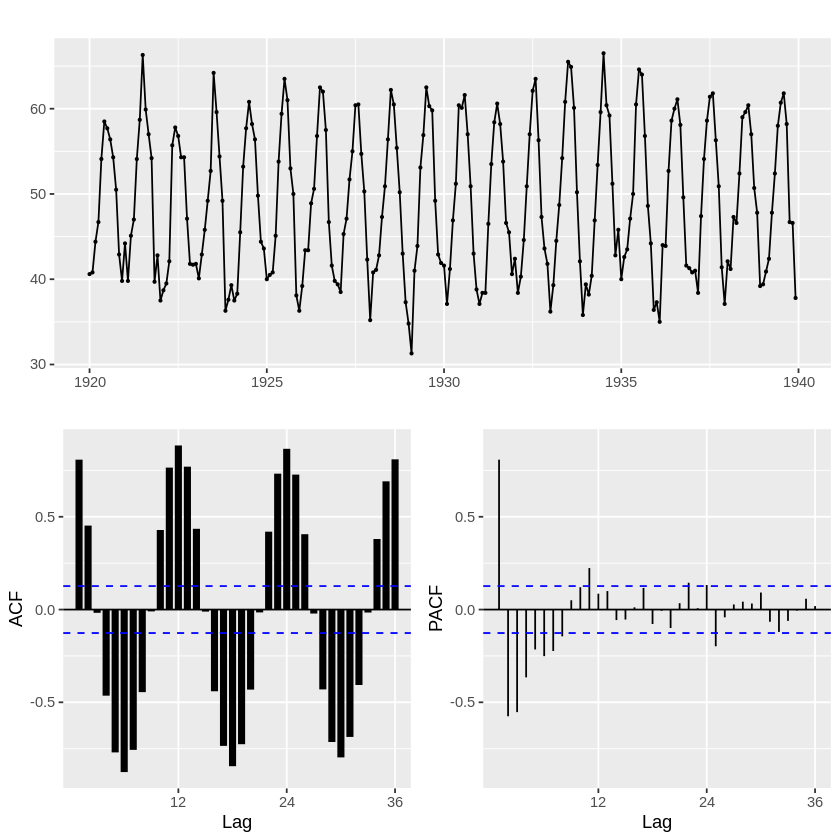

In [ ]:
## ANALIZAR LA ESTRUCTURA DE LA SERIE (FAC y FACP)
ggtsdisplay(nottem_ts,lwd=2)

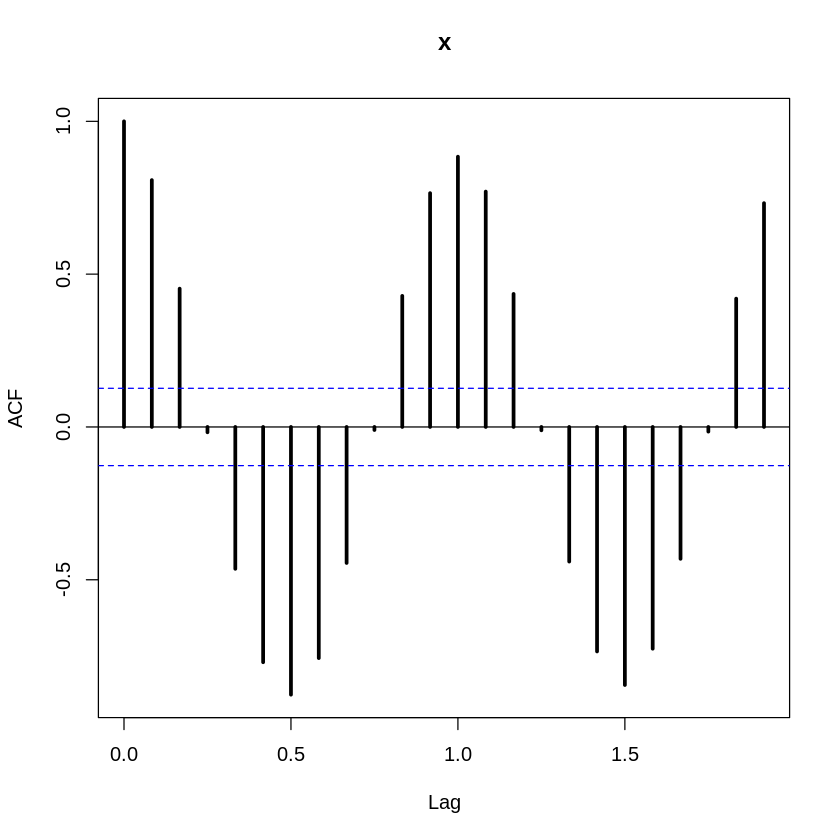

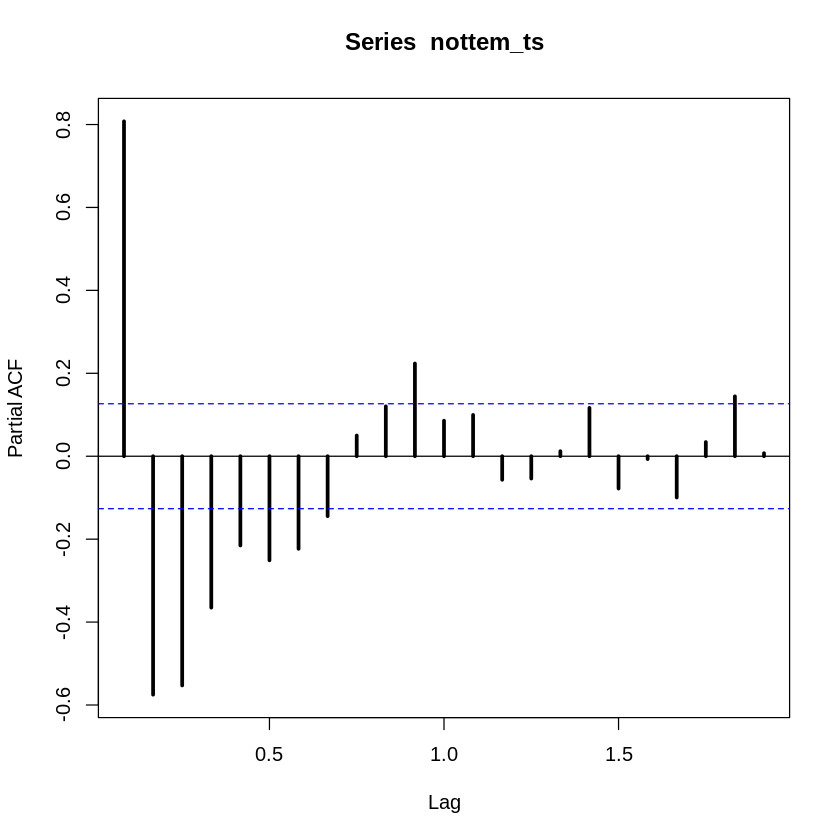

In [ ]:
acf(nottem_ts,lwd=3,);
pacf(nottem_ts,lwd=3,);

In [ ]:
nsdiffs(nottem_ts)

[1] 1

In [ ]:
## CONSTRUIR EL MODELO
nottem_ts_nn1 = nnetar(nottem_ts,
                p = 7,
                P = 2,
                size = 4)

In [ ]:
## EVALUAR RESULTADOS DEL MODELO 1
print(nottem_ts_nn1)

Series: nottem_ts 
Model:  NNAR(7,2,4)[12] 
Call:   nnetar(y = nottem_ts, p = 7, P = 2, size = 4)

Average of 20 networks, each of which is
a 9-4-1 network with 45 weights
options were - linear output units 

sigma^2 estimated as 2.778



	Ljung-Box test

data:  Residuals from NNAR(7,2,4)[12]
Q* = 34.603, df = 24, p-value = 0.07451

Model df: 0.   Total lags used: 24



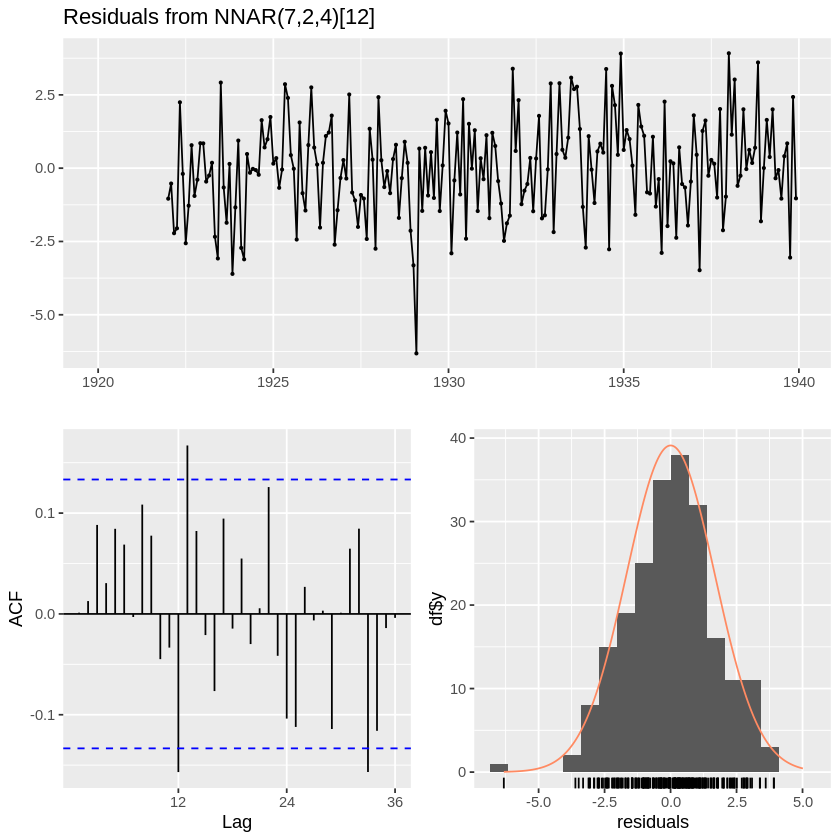

In [ ]:
## CHEQUEAR LOS RESIDUOS DEL MODELO
checkresiduals(nottem_ts_nn1)

In [ ]:
h<-c(1:length(nottem_ts)-1)
for (i in 1:length(nottem_ts)-1) {
  Q=Box.test(nottem_ts_nn1$residuals, lag=i, type='Ljung-Box')
  h[i]<-Q$p.value
}
head(h,n=30)

[1] 0.8667734 0.9442136 0.6593288 0.8085865 0.8081940 0.7918834 0.8707935
 [8] 0.7579256 0.7094764 0.7790835 0.8335979 0.5175296 0.2733674 0.2743669
[15] 0.3390729 0.3376753 0.2745595 0.3272524 0.3635982 0.4141764 0.4742064
[22] 0.2953827 0.2978331 0.2448071 0.1834718 0.2138625 0.2525704 0.2901601
[29] 0.2501007 0.2868574

In [ ]:
tseries::jarque.bera.test(na.omit(resid(nottem_ts_nn1)))


	Jarque Bera Test

data:  na.omit(resid(nottem_ts_nn1))
X-squared = 1.3509, df = 2, p-value = 0.5089


In [ ]:
fc = forecast(nottem_ts_nn1,h=24,PI=F)

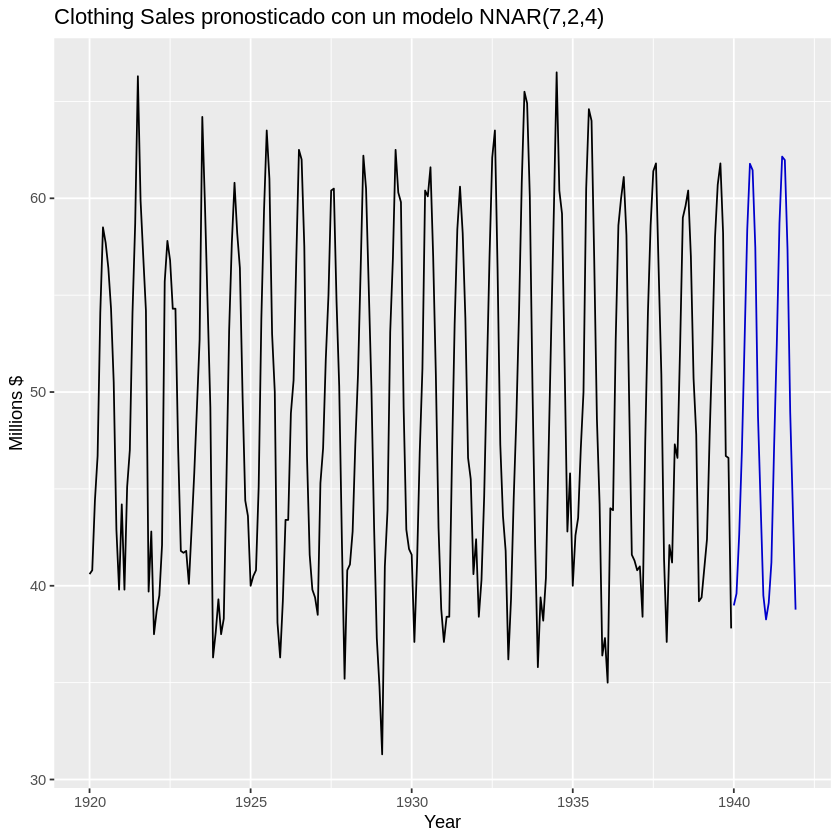

In [ ]:
## GRAFICAR LAS PREDICCIONES DE LA SERIE
autoplot(fc) +
  xlab("Year") +
  ylab("Millions $") +
  ggtitle("Clothing Sales pronosticado con un modelo NNAR(7,2,4)")

In [ ]:
## CREACIÓN DE UNA MATRIZ DE 10 SERIES CON 24 MESES
sim <- ts(matrix(0, nrow=24L, ncol=10L),
          start = end(nottem_ts)[1L],
          frequency=12)

In [ ]:
## COMPLETAR LA MATRIZ SIMULANDO VALORES CON EL MODELO ENTRENADO
for(i in seq(10)){
  sim[,i] = simulate(nottem_ts_nn1,nsim = 24L)
}

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



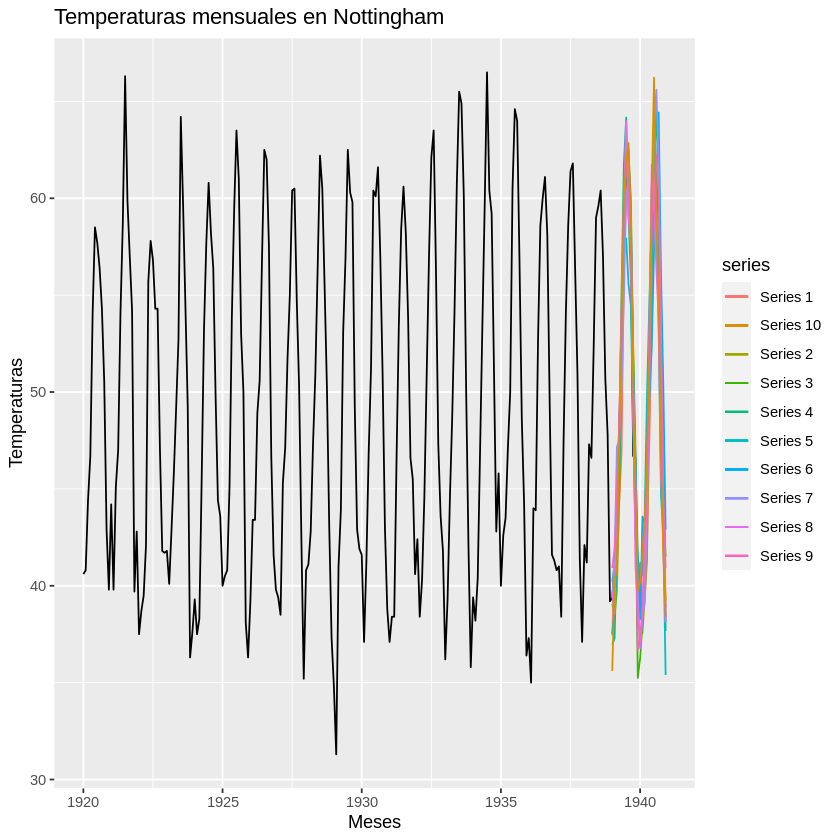

In [ ]:
## GRAFICAR LAS 10 SERIES SIMULADAS CON EL MODELO
autoplot(nottem_ts) +
  autolayer(sim) +
  ylab("Temperaturas") +
  xlab("Meses") +
  ggtitle("Temperaturas mensuales en Nottingham")

In [ ]:
## FORECASTING CON INTERVALOS DE PREDICCIÓN PARA LOS PROXIMOS 24 PASOS
fc = forecast(nottem_ts_nn1,PI=T,h=24)
print(fc)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1940       38.98399 36.87937 41.00890 35.58168 42.20225
Feb 1940       39.59739 37.50188 41.84413 36.44371 42.98941
Mar 1940       42.63643 40.76244 45.40954 39.42695 46.48517
Apr 1940       46.95341 44.70660 49.46440 43.19803 50.55551
May 1940       52.58091 49.83194 55.28877 48.46338 56.70544
Jun 1940       58.38468 55.51882 60.88917 54.18195 62.44334
Jul 1940       61.78191 58.62406 63.44441 57.19179 64.62251
Aug 1940       61.45154 58.26517 63.41664 56.79130 64.87537
Sep 1940       57.46215 54.26893 60.09594 52.67572 61.73938
Oct 1940       48.77401 46.48798 52.04084 45.17310 53.48700
Nov 1940       44.13784 41.91491 46.94823 40.58603 48.33117
Dec 1940       39.49572 37.39902 42.27564 36.49228 43.73372
Jan 1941       38.26242 36.21517 40.89176 35.03802 42.17221
Feb 1941       39.11578 37.27852 41.68436 35.98902 42.55944
Mar 1941       41.19751 39.05823 43.96774 37.53663 45.48146
Apr 1941       47.14311 43.78310 49.3474

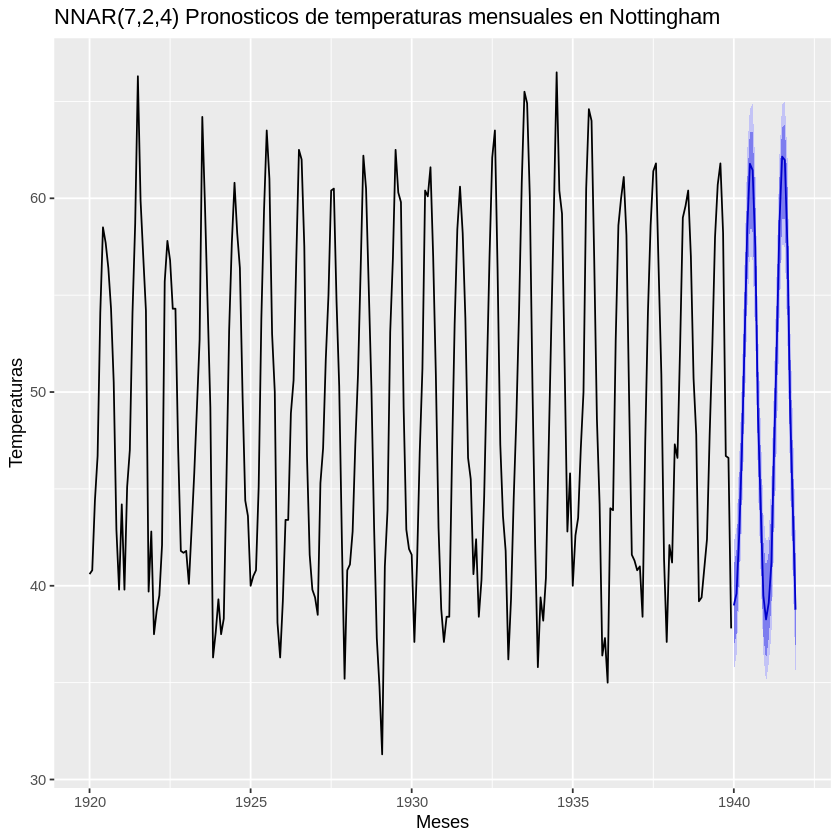

In [ ]:
## GRAFICO DE LAS PREDICCIONES DE LA SERIE
autoplot(fc) +
  xlab("Meses") +
  ylab("Temperaturas") +
  ggtitle("NNAR(7,2,4) Pronosticos de temperaturas mensuales en Nottingham")

In [ ]:
## CONSULTAR LA CANTIDAD DE DATOS DE LA SERIE
length(nottem_ts)

[1] 240

Separamos los datos en conjunto de entrenamiento y testeo

In [ ]:
nottem_ts.train = head(nottem_ts,
                   length(nottem_ts)-12)   ## MENOS LOS ÚLTIMOS 12 PARA ENTRENAR

nottem_ts.test = tail(nottem_ts,12)            ## LOS ÚLTIMOS 12 PARA TESTEAR

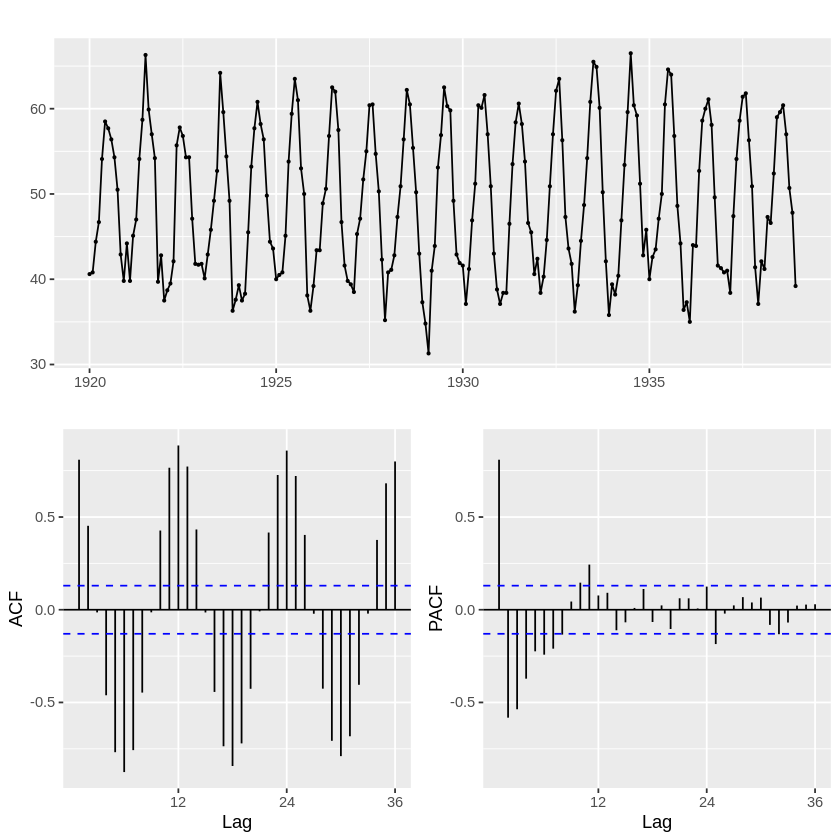

In [ ]:
## ANALIZAR LA ESTRUCTURA DE LA SERIE (FAC y FACP)
ggtsdisplay(nottem_ts.train)

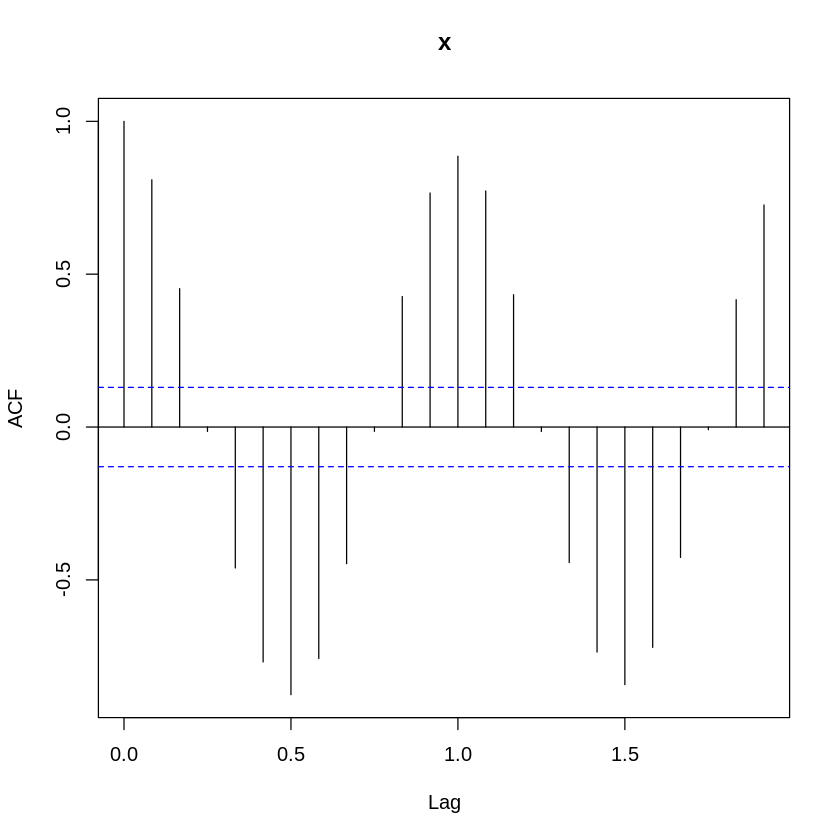

In [ ]:
acf(nottem_ts.train)

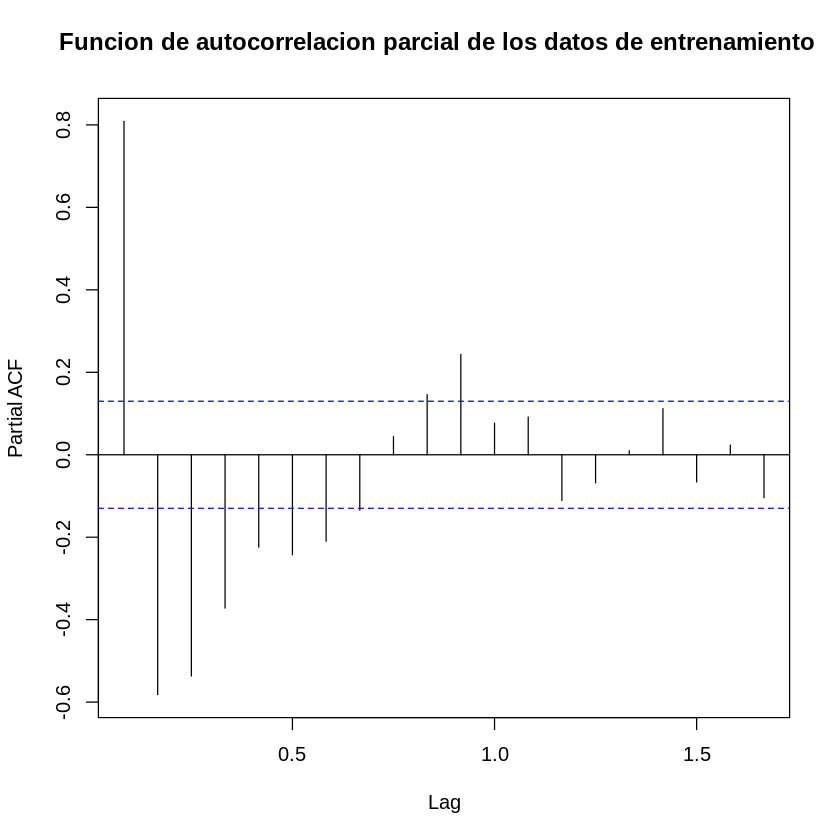

In [ ]:
pacf(nottem_ts.train , lag.max = 20,  main = "Funcion de autocorrelacion parcial de los datos de entrenamiento  ")

In [ ]:
## ENTRENAR EL MODELO CON LOS DATOS DE ENTRENAMIENTO
nottem_ts_NNAR1 = nnetar(nottem_ts.train,
                          p = 7,
                          P = 2,
                          size = 3,
                          repeats = 30)


	Ljung-Box test

data:  Residuals from NNAR(7,2,3)[12]
Q* = 31, df = 24, p-value = 0.1538

Model df: 0.   Total lags used: 24



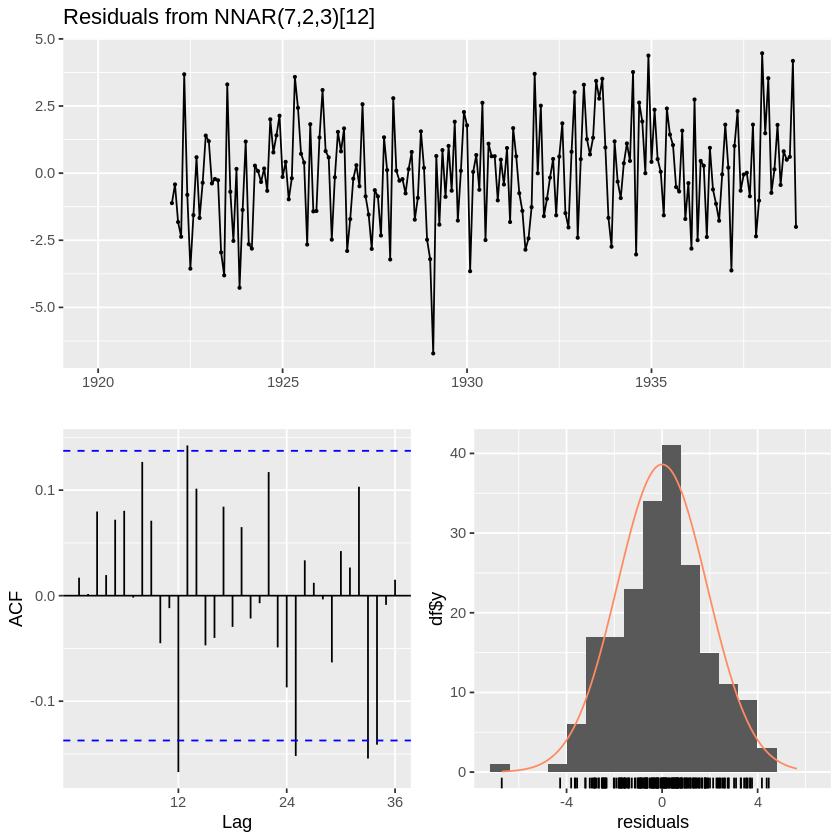

In [ ]:
## CHEQUEAR LOS RESIDUOS DEL MODELO
checkresiduals(nottem_ts_NNAR1)

Prueba de Autocorrelación Serial de los residuos (Ljung-Box)


In [ ]:
h<-c(1:length(nottem_ts.train)-1)
for (i in 1:length(nottem_ts.train)-1) {
  Q=Box.test(nottem_ts_NNAR1$residuals, lag=i, type='Ljung-Box')
  h[i]<-Q$p.value
}
head(h,n=30)

[1] 0.80588336 0.97000515 0.70778181 0.83187377 0.76676474 0.68519951
 [7] 0.78692003 0.49597711 0.48756252 0.54075043 0.62749004 0.23836150
[13] 0.10801693 0.08309995 0.10068567 0.12374583 0.11312529 0.14129899
[19] 0.14800725 0.18298741 0.22570202 0.15424980 0.17257626 0.15377335
[25] 0.06552614 0.07985330 0.10050698 0.12520659 0.12964837 0.14694322

In [ ]:
## FORECASTING CON EL MODELO ENTRENADO PARA LOS SIGUIENTES 12 PASOS ADELANTE
NNAR1fc1 = forecast(nottem_ts_NNAR1,h = 12)


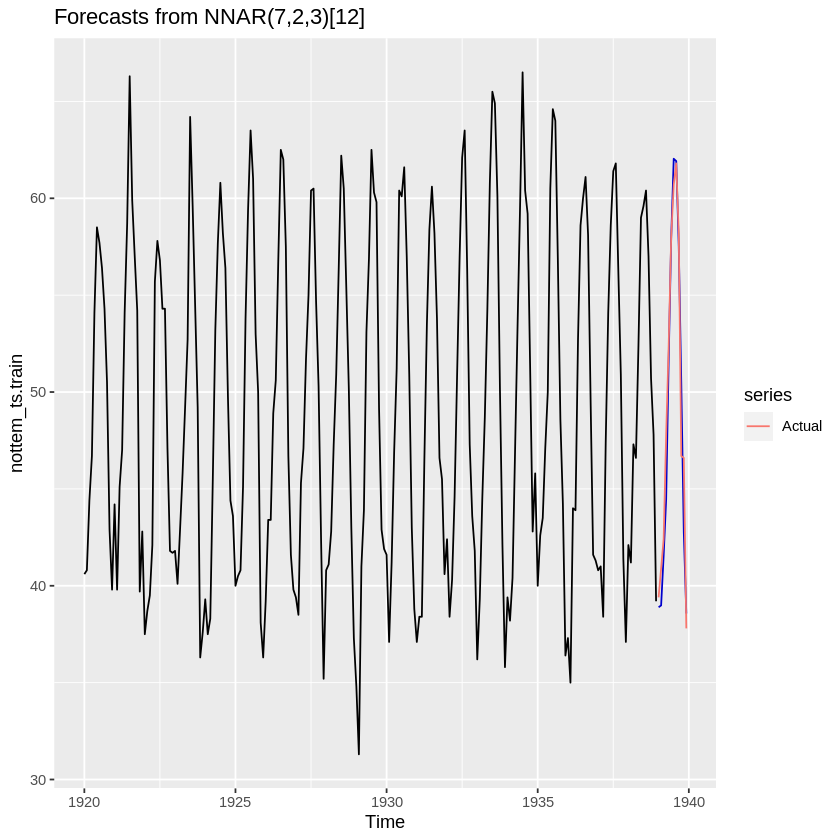

In [ ]:
## GRAFICO DE LAS PREDICCIONES CON EL MODELO ENTRENADO CON EL SOLAPAMIENTO DE LOS DATOS DE TESTING
autoplot(NNAR1fc1) +
  autolayer(nottem_ts.test,series="Actual")

In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
NNAR1_performance1=accuracy(NNAR1fc1,nottem_ts.test)

Diferentes hiperparametros

In [ ]:
## ENTRENAR EL MODELO CON LOS DATOS DE ENTRENAMIENTO
nottem_ts_NNAR2 = nnetar(nottem_ts.train,
                          p = 6,
                          P = 3,
                          size = 4,
                          repeats = 30)


	Ljung-Box test

data:  Residuals from NNAR(6,3,4)[12]
Q* = 32.297, df = 24, p-value = 0.1198

Model df: 0.   Total lags used: 24



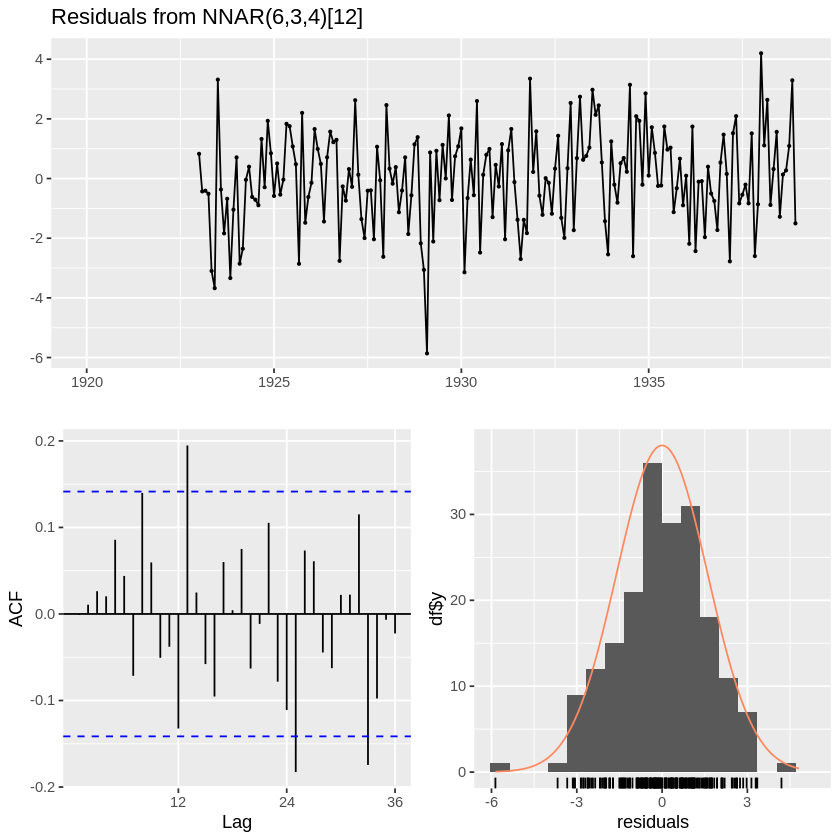

In [ ]:
## CHEQUEAR LOS RESIDUOS DEL MODELO
checkresiduals(nottem_ts_NNAR2)

In [ ]:
h<-c(1:length(nottem_ts.train)-1)
for (i in 1:length(nottem_ts.train)-1) {
  Q=Box.test(nottem_ts_NNAR2$residuals, lag=i, type='Ljung-Box')
  h[i]<-Q$p.value
}
head(h,n=30)

[1] 0.98800111 0.98854152 0.98385124 0.99326553 0.88806317 0.91082631
 [7] 0.87341805 0.52747402 0.55354937 0.59621145 0.65609772 0.42518297
[13] 0.09150450 0.12156210 0.13730164 0.11605759 0.12841800 0.16568207
[19] 0.16391040 0.17390147 0.21464626 0.16861427 0.16227021 0.11979632
[25] 0.03096792 0.03137847 0.03451330 0.04114665 0.04421754 0.05569672

In [ ]:
## FORECASTING CON EL MODELO ENTRENADO PARA LOS SIGUIENTES 12 PASOS ADELANTE
NNAR2fc2 = forecast(nottem_ts_NNAR2,h = 12)

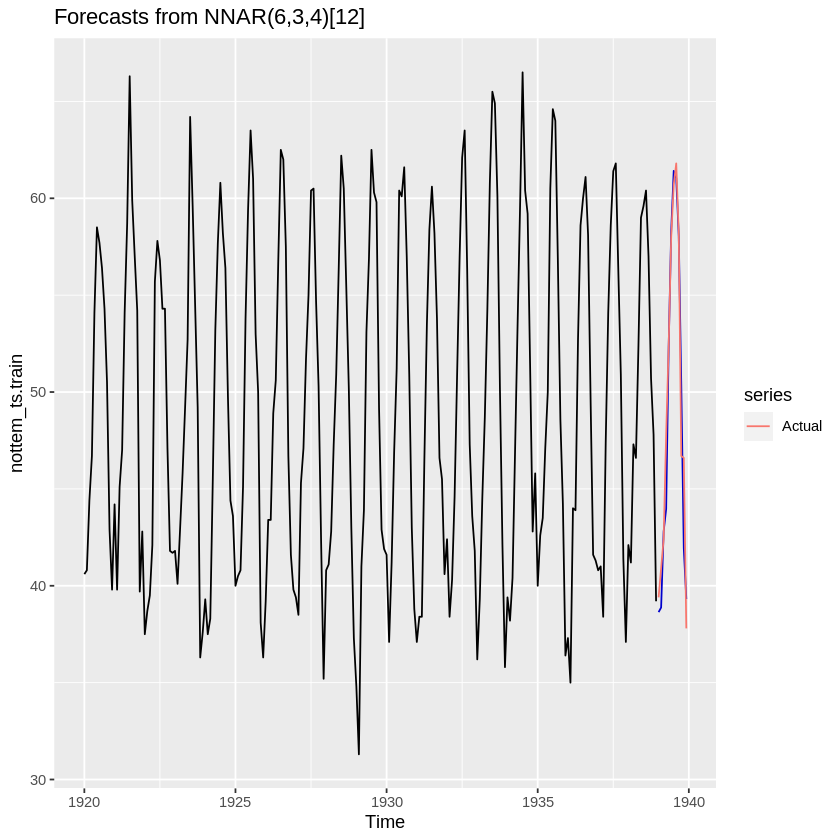

In [ ]:
## GRAFICO DE LAS PREDICCIONES CON EL MODELO ENTRENADO CON EL SOLAPAMIENTO DE LOS DATOS DE TESTING
autoplot(NNAR2fc2) +
  autolayer(nottem_ts.test,series="Actual")

In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
NNAR2_performance2=accuracy(NNAR2fc2,nottem_ts.test)


El método de Holt-Winters es un procedimiento de pronóstico de series de tiempo muy común capaz de incluir tanto la tendencia como la estacionalidad.
  

In [ ]:
## COMPARACIÓN CON OTRAS METODOLOGÍAS
## HW: HOLT-WINTERS SEASONAL METHOD
Cloth.hw = hw(nottem_ts.train,h=12)
HW_performance2=accuracy(Cloth.hw,nottem_ts.test)

ETS predice un valor futuro en función de los valores (históricos). El valor pronosticado es una continuación de los valores históricos. Este modelo utiliza tres parámetros: error, tendencia y estacional.

In [ ]:
# ETS: ERROR TREND SEASONAL METHOD
nottem_ts.ets = ets(nottem_ts.train)
fc.ets = forecast(nottem_ts.ets,h=12)
ETS_performance2=accuracy(fc.ets,nottem_ts.test)

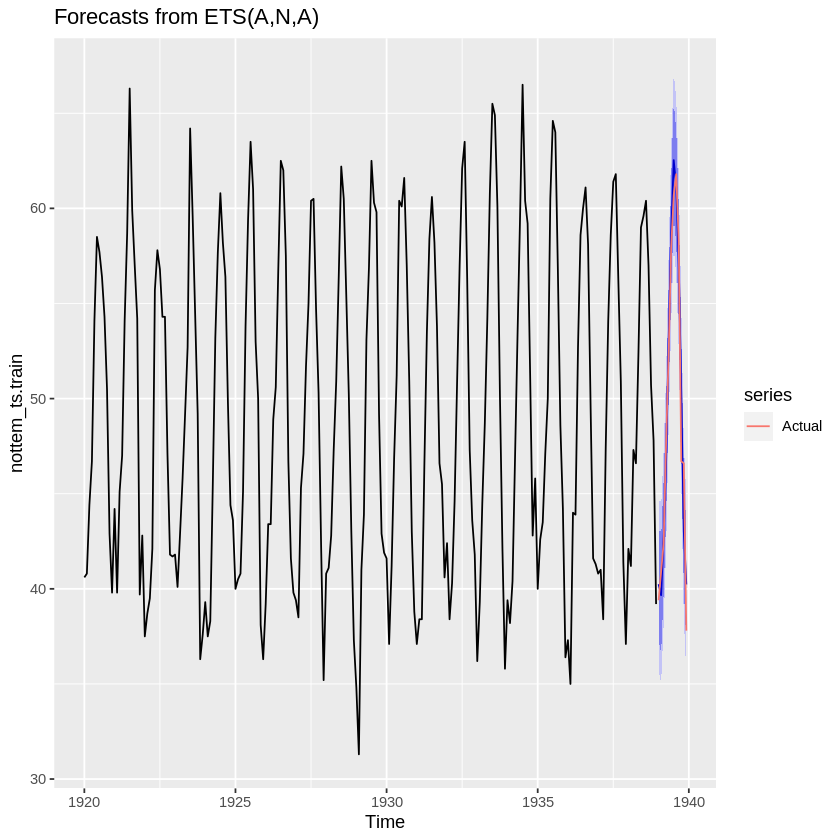

In [ ]:
## GRAFICO DE LAS PREDICCIONES CON EL MODELO ENTRENADO CON EL SOLAPAMIENTO DE LOS DATOS DE TESTING
autoplot(fc.ets) +
  autolayer(nottem_ts.test,series="Actual")

ETS es más flexible y permite una combinación de modelos con sus componentes de error, tendencia y estacionalidad que pueden ser tanto aditivos como multiplicativos.
Holt-Winters es más específico y se centra en suavizar los componentes de nivel, tendencia y estacionalidad, con variantes aditivas y multiplicativas, pero no modela el componente de error explícitamente como ETS


Modelo ARIMA

In [ ]:
# ARIMA: ENTRENAR MODELO, FORECASTING PARA LOS PRÓXIMOS 12 PASOS Y EVALUACIÓN DE PERFORMANCE
nottem_ts.ARIMA = auto.arima(nottem_ts.train,
                         approximation = F,
                         stepwise = F)

fc.ARIMA = forecast(nottem_ts.ARIMA,h=12)
ARIMA_performance2 = accuracy(fc.ARIMA,nottem_ts.test)

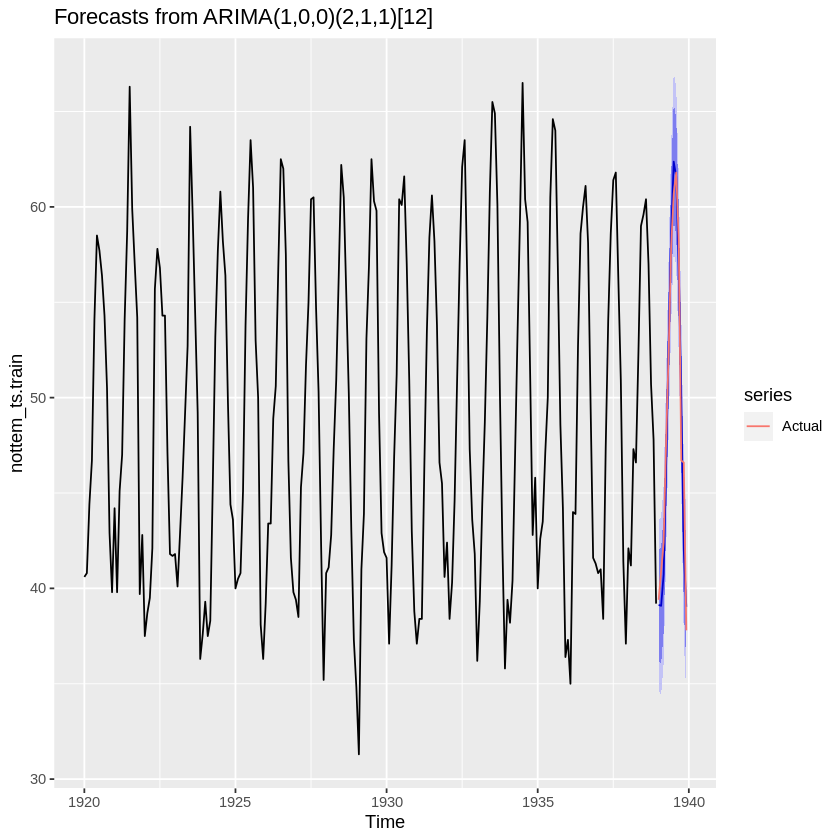

In [ ]:
## GRAFICO DE LAS PREDICCIONES CON EL MODELO ENTRENADO CON EL SOLAPAMIENTO DE LOS DATOS DE TESTING
autoplot(fc.ARIMA) +
  autolayer(nottem_ts.test,series="Actual")

Performance de los diferentes modelos

In [ ]:
print('Modelo Autorregresivo de Redes Neuronales (7,2,4) ')
NNAR1_performance1
print('Modelo Autorregresivo de Redes Neuronales (6,3,4)')
NNAR2_performance2
print('Metodo HOLT-WINTERS Estacional')
HW_performance2
print('Método de Error de Tendencia Estacional')
ETS_performance2
print('Modelo ARIMA')
ARIMA_performance2

[1] "Modelo Autorregresivo de Redes Neuronales (7,2,4) "


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001744415,1.875885,1.478608,-0.1956293,3.162818,0.5380380,0.01707951,NA
Test set,0.490460914,2.002058,1.492902,1.1070207,3.197376,0.5432394,-0.33662038,0.41853


[1] "Modelo Autorregresivo de Redes Neuronales (6,3,4)"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-9.644608e-05,1.599898,1.263051,-0.1668744,2.700091,0.4596009,-0.001076918,NA
Test set,4.698720e-01,2.204951,1.572366,0.9984055,3.420738,0.5721546,-0.518282124,0.4676775


[1] "Metodo HOLT-WINTERS Estacional"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.003848062,2.277459,1.776051,-0.2055877,3.832650,0.6462721,0.2146765,NA
Test set,-0.334828473,1.914172,1.548670,-0.7551918,3.297899,0.5635324,-0.6419984,0.3781231


[1] "Método de Error de Tendencia Estacional"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.03995291,2.268832,1.761020,-0.1537564,3.791662,0.6408023,0.2253059,NA
Test set,-0.22949020,1.844480,1.498403,-0.5551446,3.193173,0.5452409,-0.6652495,0.3625084


[1] "Modelo ARIMA"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.06535732,2.195569,1.699237,-0.1549057,3.641334,0.6183208,-0.01561588,NA
Test set,0.33500606,1.946686,1.525413,0.7904404,3.243752,0.5550696,-0.44761405,0.4029161


ERROR: Error in parse(text = input): <text>:1:8: unexpected symbol
1: import pandas
           ^


Comentarios =

Método de Error de Tendencia Estacional segun criterios puede ser el mejor modelo en general, RMSE más bajo. Además, aunque no tiene el MAE más bajo, está muy cerca del mejor MAE y tiene un buen balance entre las métricas.

Entonces, basado en estas métricas, el Método de Error de Tendencia Estacional sería el recomendado